In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

37.04080700434136 -80.28814815286138
55.46318104002401 42.93709858018829
58.47105743320503 -90.11878120623807
-43.678423505234534 -79.37113687521463
37.17751099328092 162.3761554207914
33.84653151692898 -48.745171129920465
-31.832692909976743 2.0165198833453246
-4.065314651174745 -23.097445381509317
67.4671486337734 -154.8005477672364
43.845303678476256 -96.95246527498516
50.954921134432595 39.3834168742963
-86.71717005615935 -150.01850363982766
32.12462697072999 121.73186608923368
-73.41707132648226 143.95251884646285
-30.014730453443335 -74.05819914498758
28.142520875567584 33.47959970281764
-83.83898594206165 -128.28438235459308
55.689263178296954 127.90211469329546
57.751156898468224 -45.240475659123774
-89.57096834328487 139.08216632697446
-80.69140383817259 -70.03279508572179
-1.2445676604187526 179.68990654310693
-17.422951238506727 -66.92719534281929
-37.50148100576237 72.53513748054633
35.760801705133574 -11.311615693376552
75.6529295906472 123.80741137822906
24.79158609931377

74.76864416885732 71.08739039335424
-62.96957099057226 -150.5968493377468
51.27404047439353 63.03025190279868
-83.48136762730533 -119.91821848184789
56.801313726538694 106.1950068577674
-54.15216103440252 104.57330640456217
80.70771910090514 176.8478298821745
15.201050695054434 -139.9002669619512
-59.538551605666825 -32.04036500656727
16.729716386289155 -110.30566521424649
-77.97995340726314 168.61493099502547
67.85394198480103 -173.03083522277376
8.736907357182545 23.29096230782352
8.469656386848143 119.94102807631174
-61.93138485588881 96.39657442487982
-88.33512400455201 -10.638484165982305
47.922746197468456 -87.92754407869191
-85.87545248946057 -119.70415221975864
-23.46852043264424 41.55671252388743
31.405809077200757 -34.75604262103079
-19.77756944183575 -158.6476221526033
8.577458145794822 179.9249718972717
-6.196237737008403 -119.64275264308944
-50.37121479851635 -30.509211448650774
0.04777873154552026 132.30339751498627
83.15533035458469 -177.3470867092979
63.944372106071285 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d4c01ee4a7bb7b17bffe2484c9ccd182


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | christiansburg
Processing Record 2 of Set 1 | mukhtolovo
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | madison
Processing Record 11 of Set 1 | georgiu-dezh
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | huilong
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | hurghada
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | zeya
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | rungata
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 39 of Set 4 | havre-saint-pierre
Processing Record 40 of Set 4 | abalak
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | vaitape
Processing Record 43 of Set 4 | butaritari
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | aginskoye
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | eldikan
City not found. Skipping...
Processing Record 49 of Set 4 | saint-ambroise
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | farafangana
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | talnakh
Processing Record 10 of Set 

Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | barbar
City not found. Skipping...
Processing Record 33 of Set 8 | buraydah
Processing Record 34 of Set 8 | oktyabrskiy
Processing Record 35 of Set 8 | sorvag
City not found. Skipping...
Processing Record 36 of Set 8 | ereymentau
Processing Record 37 of Set 8 | hirara
Processing Record 38 of Set 8 | mtinko
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | barmer
Processing Record 41 of Set 8 | walvis bay
Processing Record 42 of Set 8 | shache
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | burias
Processing Record 45 of Set 8 | mogadishu
Processing Record 46 of Set 8 | cascais
Processing Record 47 of Set 8 | port elizabeth
Processing Record 48 of Set 8 | amderma
City not found. Skipping...
Processing Record 49 of Set 8 | ilulissat
Processing Record 50 of Set 8 | danilovka
Processing Record 1 of Set 9 | cravo norte
Processing Record 2 of Set 9 | xifeng
Processing Record

Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | moerai
Processing Record 19 of Set 12 | satitoa
City not found. Skipping...
Processing Record 20 of Set 12 | berlevag
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | pombia
Processing Record 23 of Set 12 | rio gallegos
Processing Record 24 of Set 12 | kommunisticheskiy
Processing Record 25 of Set 12 | tsabong
Processing Record 26 of Set 12 | naryan-mar
Processing Record 27 of Set 12 | worland
Processing Record 28 of Set 12 | santa marta
Processing Record 29 of Set 12 | mattawa
Processing Record 30 of Set 12 | sompeta
Processing Record 31 of Set 12 | talagang
Processing Record 32 of Set 12 | ugoofaaru
Processing Record 33 of Set 12 | ayr
Processing Record 34 of Set 12 | laem sing
Processing Record 35 of Set 12 | wajima
Processing Record 36 of Set 12 | pishin
Processing Record 37 of Set 12 | smolenka
Processing Record 38 of Set 12 | mbaiki
Processing Record 39 of Set 12 | palmas
Pro

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Christiansburg,37.1298,-80.4089,73.60,96,0,0.00,US,2022-07-28 02:15:12
1,Mukhtolovo,55.4644,43.1953,63.77,91,13,5.14,RU,2022-07-28 02:15:13
2,Thompson,55.7435,-97.8558,53.65,92,100,2.77,CA,2022-07-28 02:14:24
3,Castro,-24.7911,-50.0119,57.09,81,98,2.64,BR,2022-07-28 02:15:13
4,Severo-Kurilsk,50.6789,156.1250,55.38,86,96,7.07,RU,2022-07-28 02:15:14
5,Torbay,47.6666,-52.7314,63.57,90,75,16.11,CA,2022-07-28 02:15:14
6,Luderitz,-26.6481,15.1594,54.48,76,0,1.61,NA,2022-07-28 02:15:14
7,Georgetown,5.4112,100.3354,85.93,81,20,4.61,MY,2022-07-28 02:15:10
8,Barrow,71.2906,-156.7887,33.82,100,100,18.41,US,2022-07-28 02:15:15
9,Madison,34.7334,-86.5667,86.79,68,97,10.00,US,2022-07-28 02:15:15


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Christiansburg,US,2022-07-28 02:15:12,37.1298,-80.4089,73.60,96,0,0.00
1,Mukhtolovo,RU,2022-07-28 02:15:13,55.4644,43.1953,63.77,91,13,5.14
2,Thompson,CA,2022-07-28 02:14:24,55.7435,-97.8558,53.65,92,100,2.77
3,Castro,BR,2022-07-28 02:15:13,-24.7911,-50.0119,57.09,81,98,2.64
4,Severo-Kurilsk,RU,2022-07-28 02:15:14,50.6789,156.1250,55.38,86,96,7.07
5,Torbay,CA,2022-07-28 02:15:14,47.6666,-52.7314,63.57,90,75,16.11
6,Luderitz,NA,2022-07-28 02:15:14,-26.6481,15.1594,54.48,76,0,1.61
7,Georgetown,MY,2022-07-28 02:15:10,5.4112,100.3354,85.93,81,20,4.61
8,Barrow,US,2022-07-28 02:15:15,71.2906,-156.7887,33.82,100,100,18.41
9,Madison,US,2022-07-28 02:15:15,34.7334,-86.5667,86.79,68,97,10.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

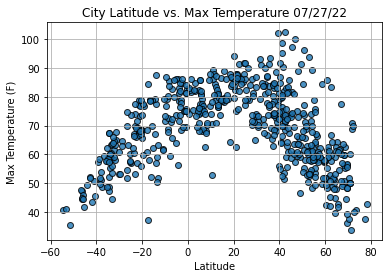

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

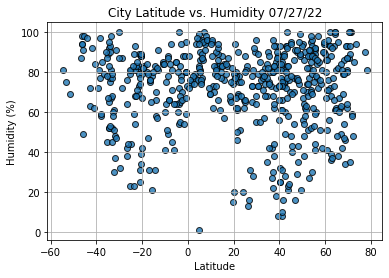

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

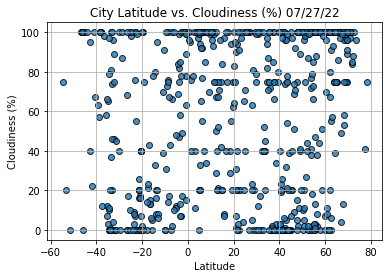

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

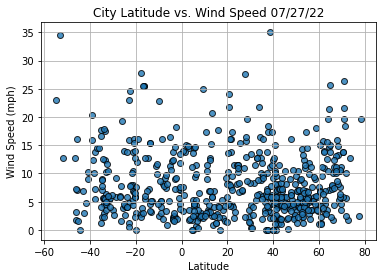

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Coquimbo
Country                        CL
Date          2022-07-28 02:14:48
Lat                      -29.9533
Lng                      -71.3436
Max Temp                    53.33
Humidity                      100
Cloudiness                     40
Wind Speed                   3.44
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0

0       True
1       True
2       True
3      False
4       True
       ...  
579     True
580     True
581    False
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Christiansburg,US,2022-07-28 02:15:12,37.1298,-80.4089,73.60,96,0,0.00
1,Mukhtolovo,RU,2022-07-28 02:15:13,55.4644,43.1953,63.77,91,13,5.14
2,Thompson,CA,2022-07-28 02:14:24,55.7435,-97.8558,53.65,92,100,2.77
4,Severo-Kurilsk,RU,2022-07-28 02:15:14,50.6789,156.1250,55.38,86,96,7.07
5,Torbay,CA,2022-07-28 02:15:14,47.6666,-52.7314,63.57,90,75,16.11
...,...,...,...,...,...,...,...,...,...
578,West Bay,KY,2022-07-28 02:30:42,19.3667,-81.4167,84.27,82,20,9.22
579,Douglas,US,2022-07-28 02:30:42,41.3000,-96.1670,80.47,61,0,5.75
580,Srednekolymsk,RU,2022-07-28 02:30:43,67.4500,153.6833,57.13,42,99,10.45
582,Auch,FR,2022-07-28 02:30:43,43.6500,0.5833,60.89,58,0,1.99


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Christiansburg,US,2022-07-28 02:15:12,37.1298,-80.4089,73.60,96,0,0.00
1,Mukhtolovo,RU,2022-07-28 02:15:13,55.4644,43.1953,63.77,91,13,5.14
2,Thompson,CA,2022-07-28 02:14:24,55.7435,-97.8558,53.65,92,100,2.77
4,Severo-Kurilsk,RU,2022-07-28 02:15:14,50.6789,156.1250,55.38,86,96,7.07
5,Torbay,CA,2022-07-28 02:15:14,47.6666,-52.7314,63.57,90,75,16.11


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

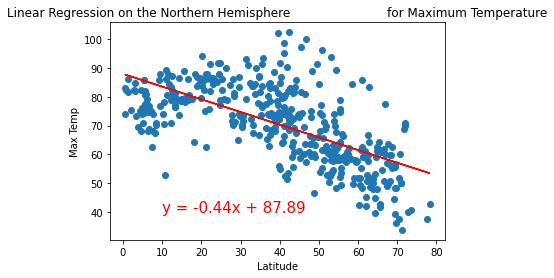

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

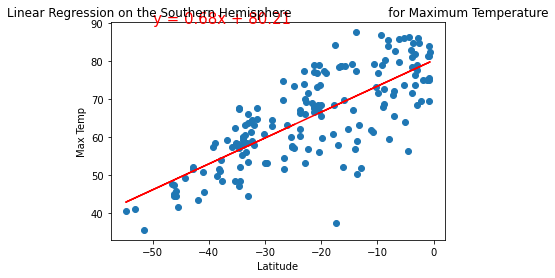

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

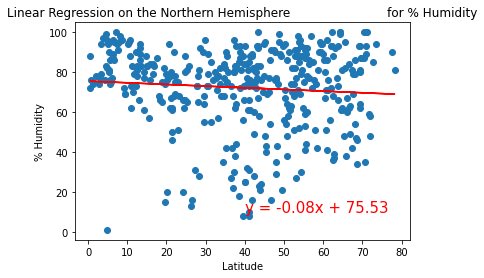

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

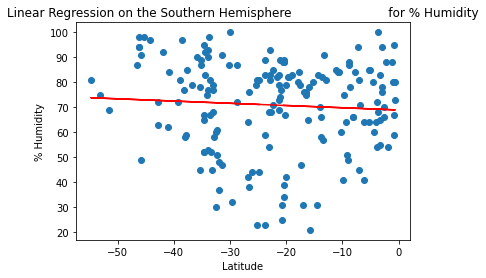

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

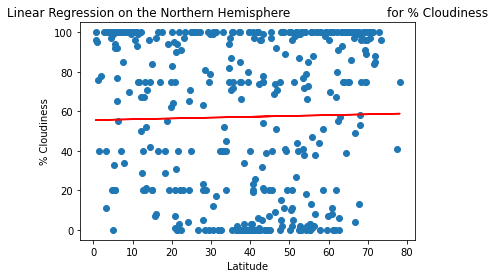

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

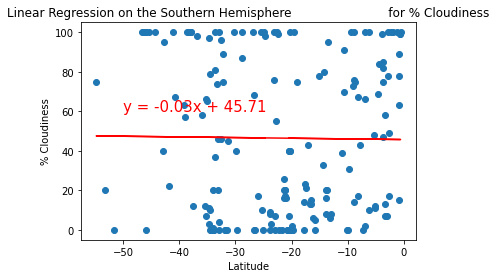

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

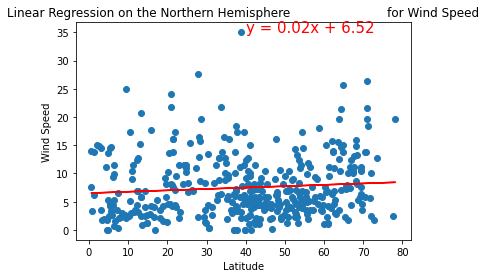

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

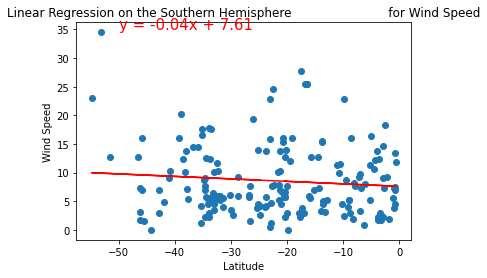

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))